In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, time
%matplotlib inline


In [2]:
# Importing the csv file
df = pd.read_csv('My Uber Drives - 2016.csv')

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace("*", "")

C:\Users\HP\AppData\Local\Temp\ipykernel_33424\3775606992.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace("*", "")


In [6]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [7]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
df.shape

(1156, 7)

In [10]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [11]:
# Checking the sum of 'null' values in each columns
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

<AxesSubplot:>

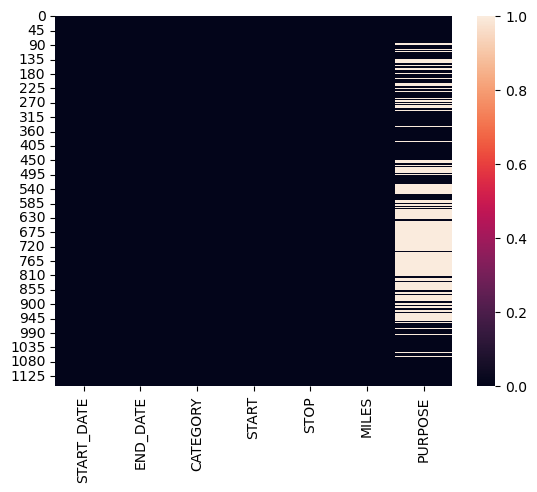

In [12]:
# Plotting the 'heatmap'
sns.heatmap(data=df.isnull())

In [13]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [14]:
# Dropping all the null values in these particulat columns
# Dropping the rows having null values
df.dropna(subset=['END_DATE', 'CATEGORY', 'START', 'STOP'], axis=0, inplace=True, how='all')


In [15]:
df.isnull().sum()


START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [16]:
# Filling the null values of 'PURPOSE' column
df['PURPOSE'].fillna(method='ffill', inplace=True)

In [17]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [19]:

#pd.to_datetime()
#Convert argument to datetime.
#This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.
#Using errors = 'coerce', it will replace all non-numeric values with NaNdf['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [21]:
df['START_DATE']

0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: START_DATE, Length: 1155, dtype: datetime64[ns]

In [22]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [23]:
# CATEGORY COLUMN
df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

In [24]:
# Way 1
category = pd.crosstab(index = df['CATEGORY'], columns ='count of records')

category

col_0,count of records
CATEGORY,
Business,1078
Personal,77


<AxesSubplot:xlabel='CATEGORY'>

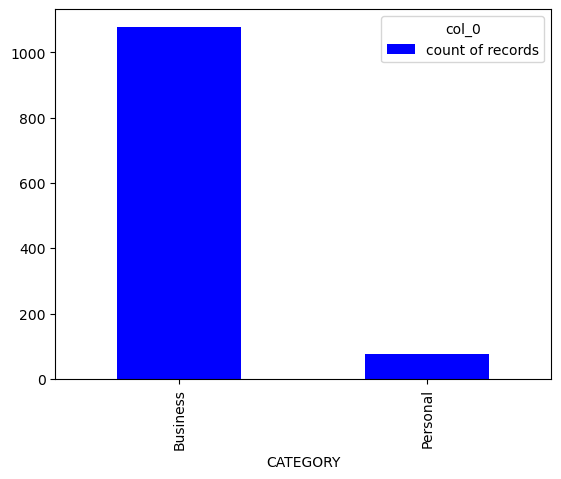

In [26]:
category.plot(kind='bar', color='b')

In [27]:
# Way 2
df['CATEGORY'].value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

In [28]:
df.CATEGORY.value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

<AxesSubplot:>

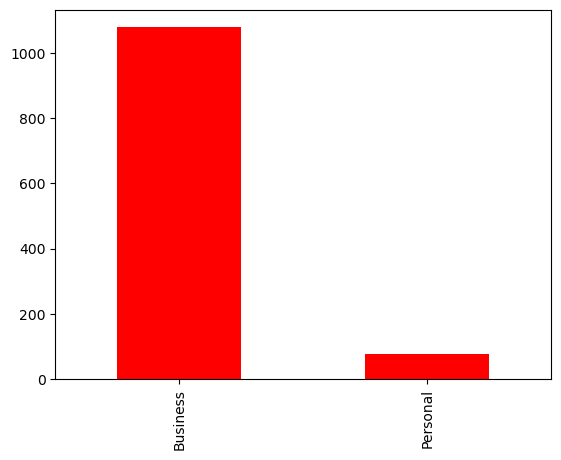

In [29]:
df['CATEGORY'].value_counts().plot(kind = 'bar', color='r')

In [30]:
# START Column
start_point = df.START.value_counts()

In [31]:
start_point.head(20)

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
New Orleans          10
Emeryville           10
Downtown              9
Edgehill Farms        8
Name: START, dtype: int64

<AxesSubplot:ylabel='START'>

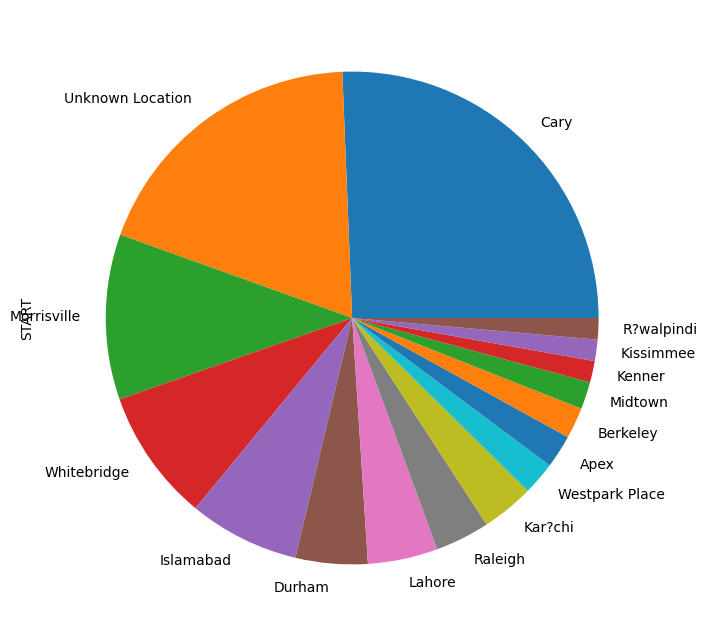

In [32]:
# START point chossen for more than 10 times
plt.figure(figsize=(10,8))
start_point[start_point>10].plot(kind='pie')

<AxesSubplot:ylabel='START'>

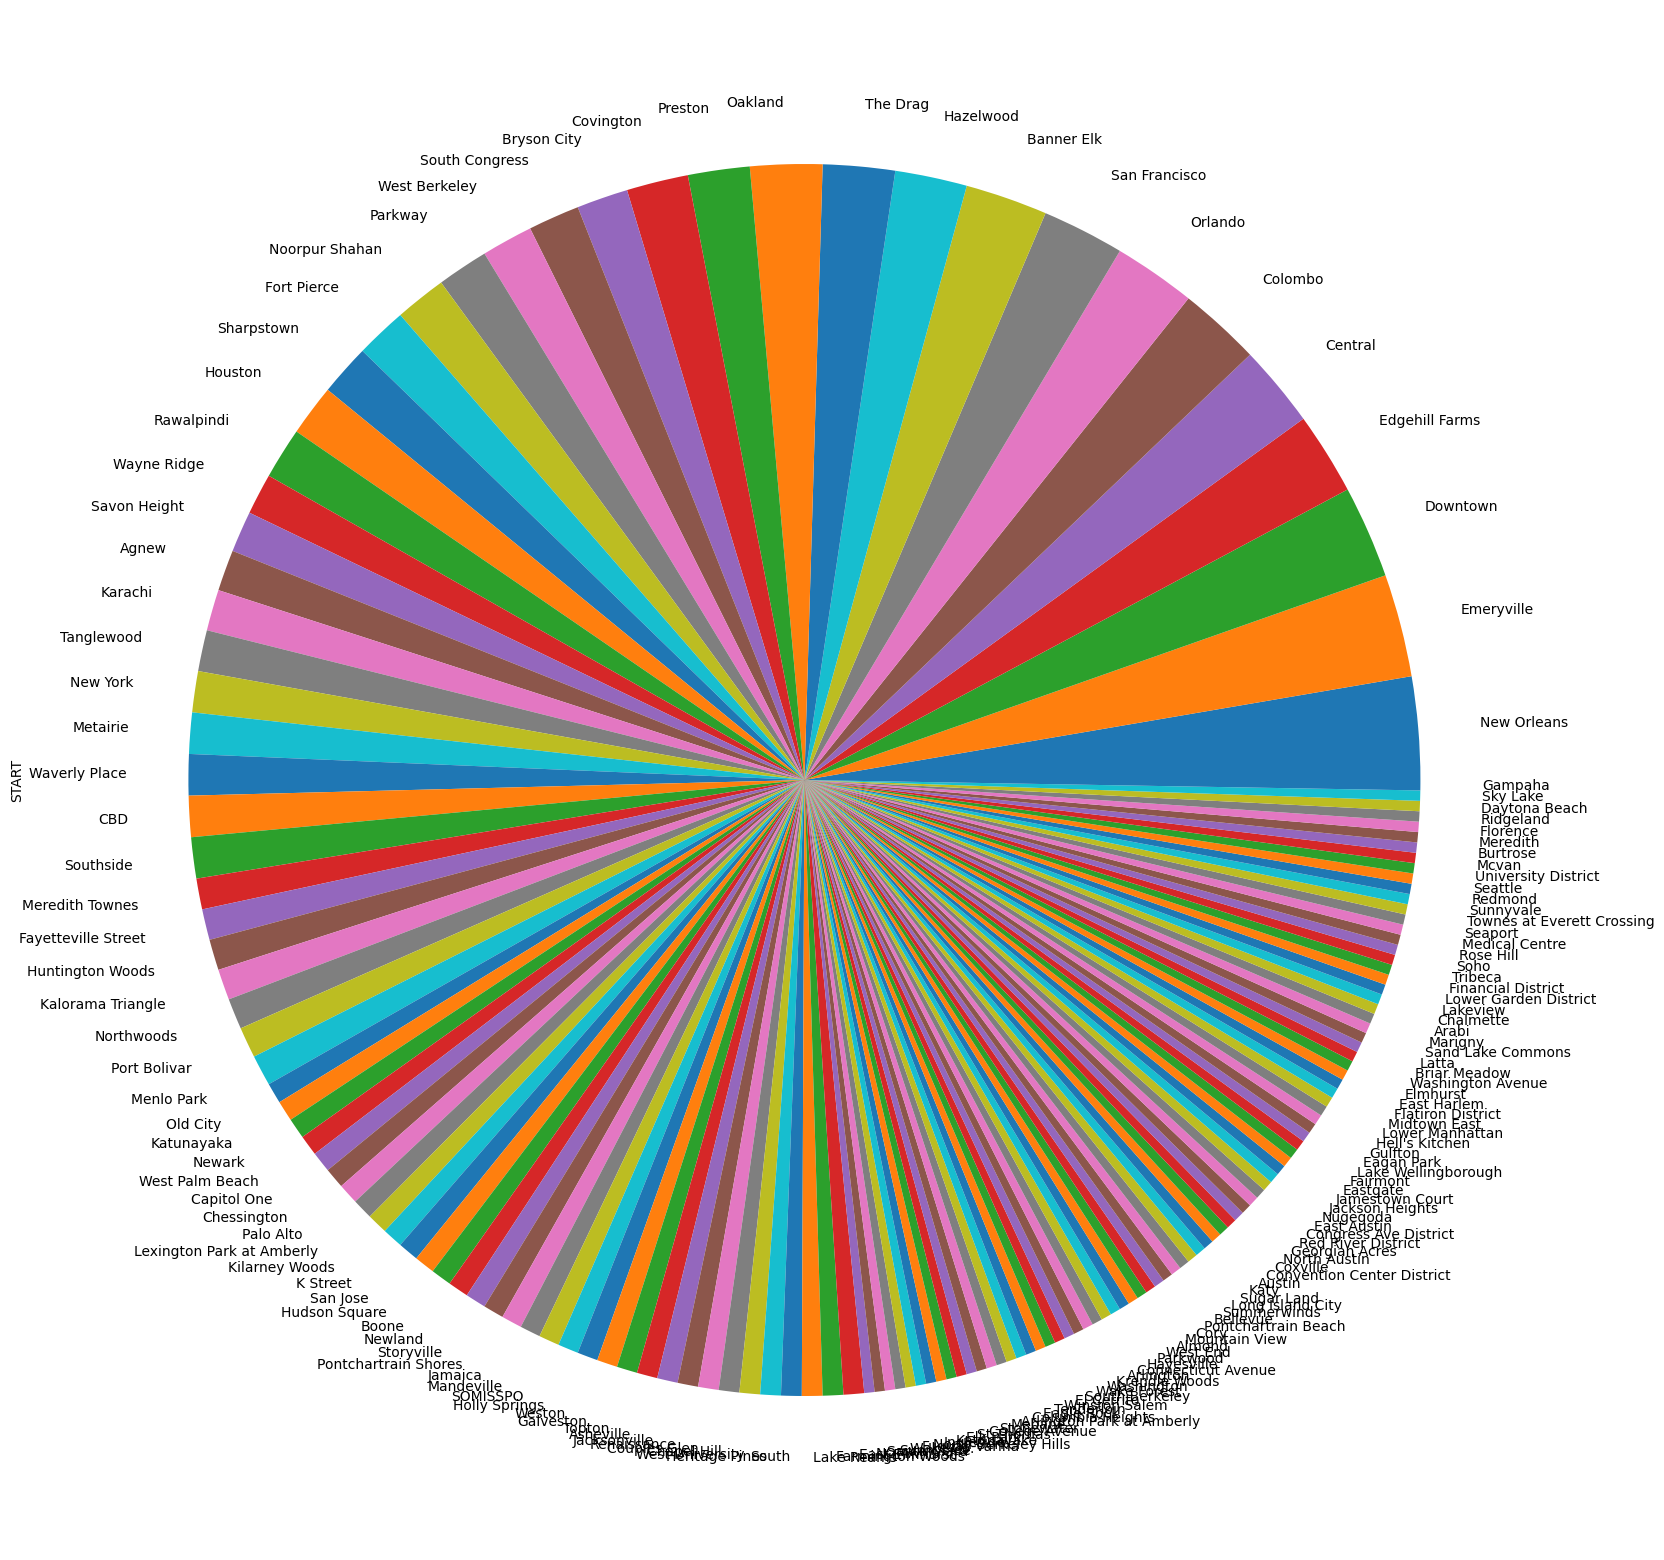

In [36]:
# START point chossen for less than 10 times
plt.figure(figsize=(20,20))
start_point[start_point<=10].plot(kind='pie')

In [37]:
# STOP column
stop_point = df['STOP'].value_counts()

In [38]:
stop_point.head(15)

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP, dtype: int64

<AxesSubplot:ylabel='START'>

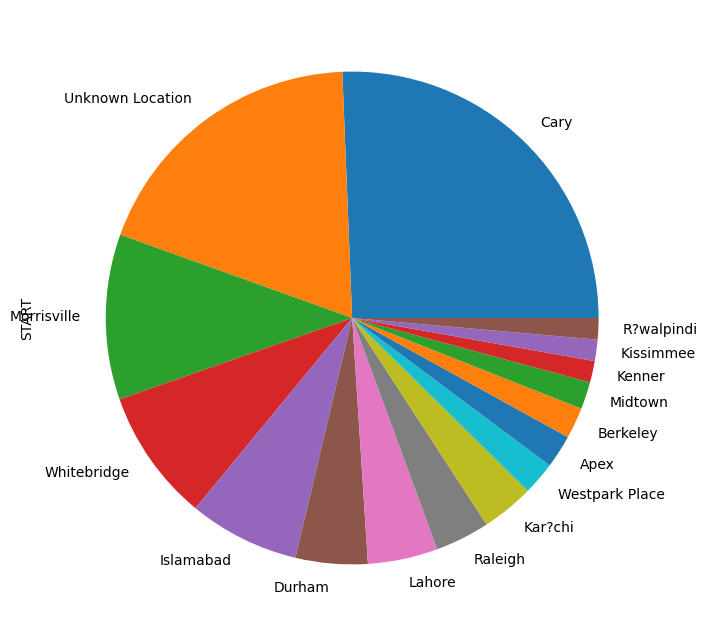

In [40]:
# STOP point chossen for more than 10 times
plt.figure(figsize=(10,8))
start_point[start_point>10].plot(kind='pie')

<AxesSubplot:ylabel='START'>

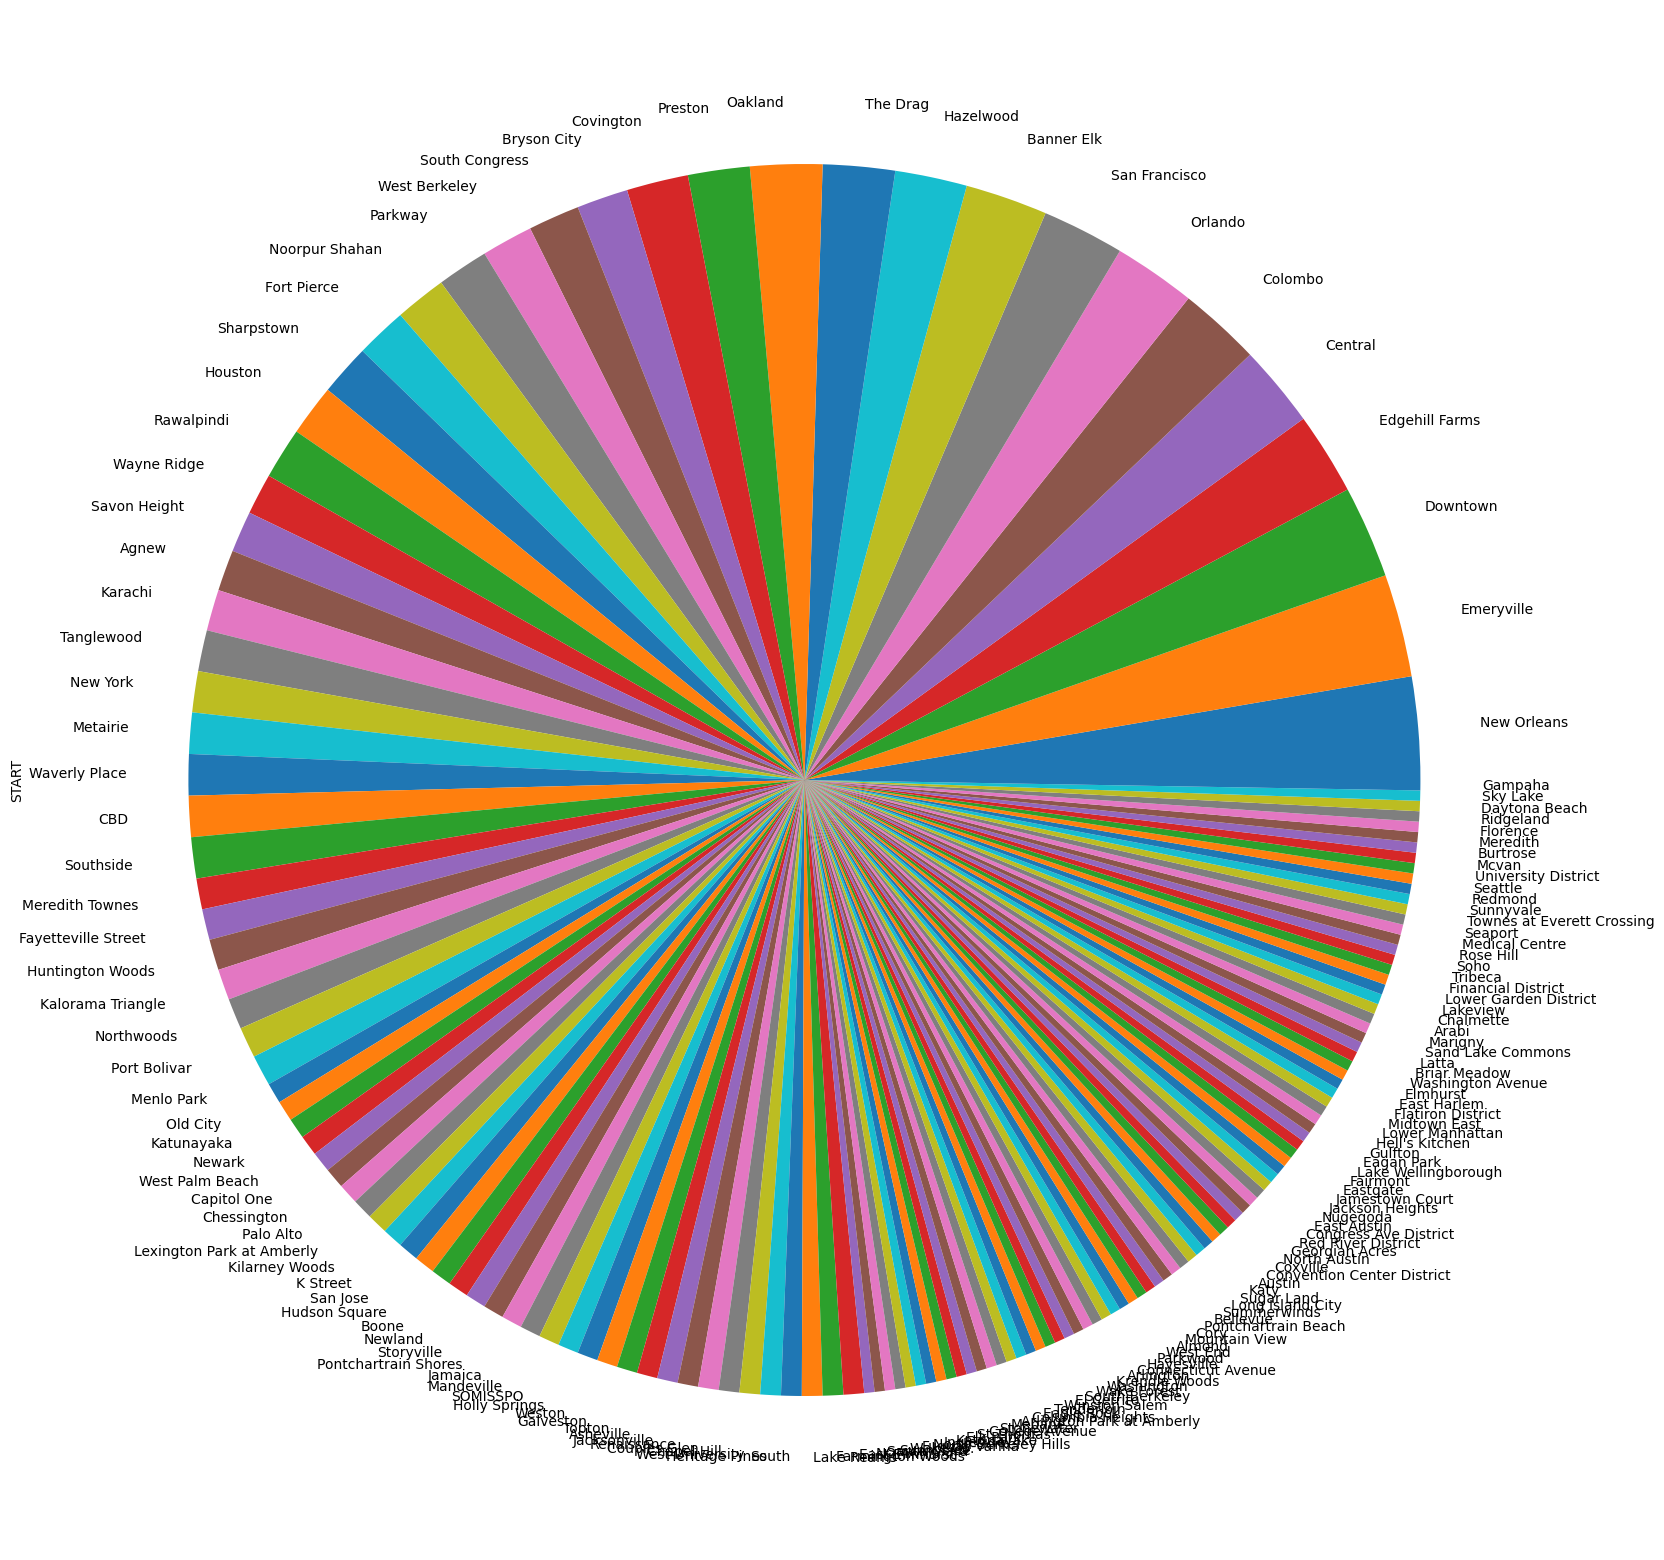

In [41]:
# STOP point chossen for more less 10 times
plt.figure(figsize=(20,20))
start_point[start_point<=10].plot(kind='pie')


In [42]:
# MILES column
miles = df.MILES.value_counts()

In [43]:
len(miles.unique())

20

In [44]:
miles.head()

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
Name: MILES, dtype: int64

<AxesSubplot:>

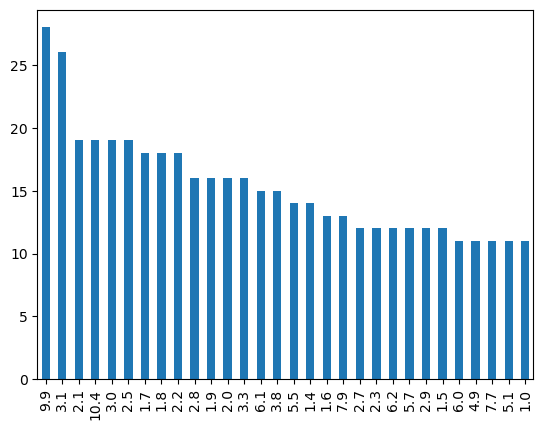

In [45]:
miles[miles>10].plot(kind='bar')

<AxesSubplot:ylabel='MILES'>

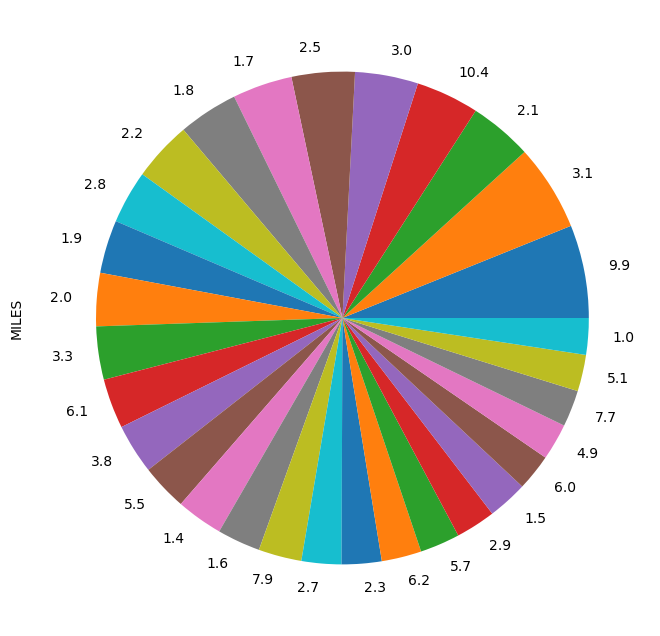

In [46]:
plt.figure(figsize=(10,8))
miles[miles>10].plot(kind='pie')

<AxesSubplot:>

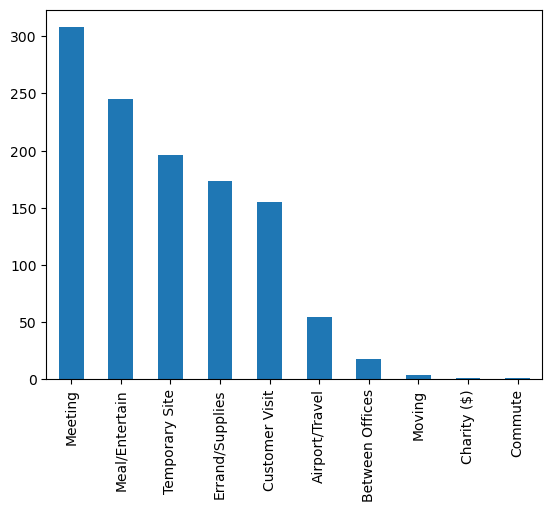

In [47]:
# PORPOSE columns
# Bar plot for the Different PORPOSES 
df.PURPOSE.value_counts().plot(kind='bar')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

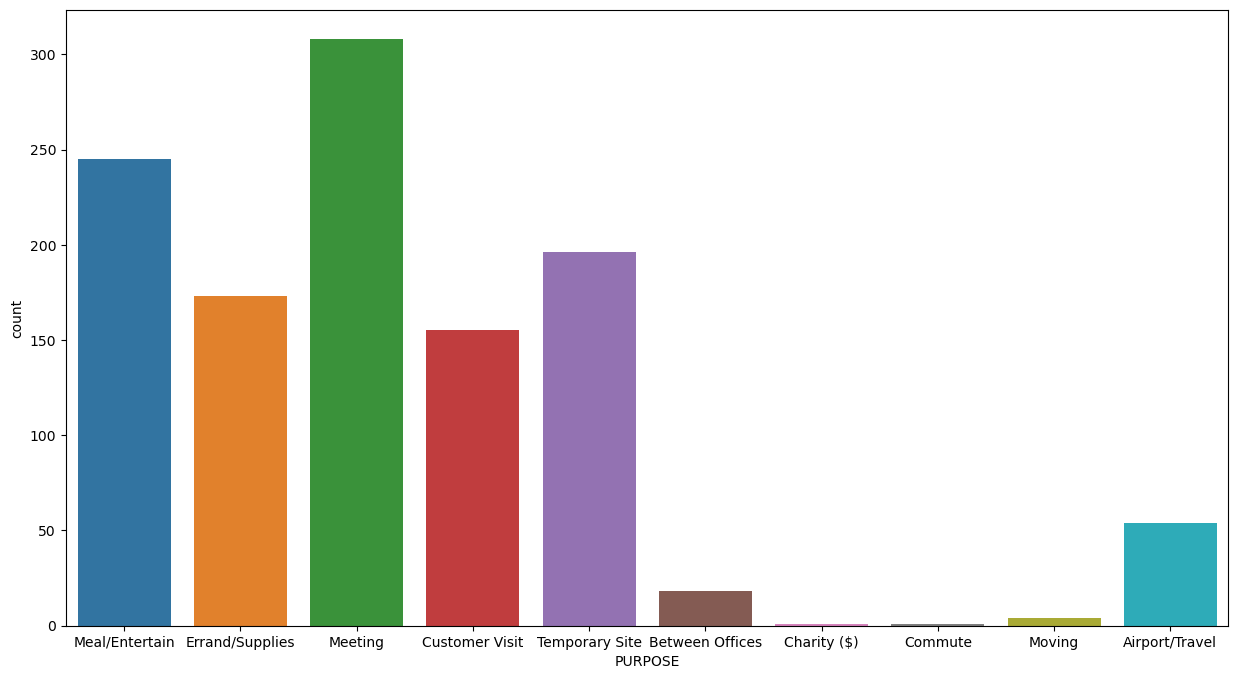

In [48]:
plt.figure(figsize = (15,8))
sns.countplot(df.PURPOSE)

In [49]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [50]:
# Adding column of the travelling time of the passengers
df['minutes'] = df.END_DATE - df.START_DATE

In [51]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [52]:
# dt=date
df['minutes'] = df['minutes'].dt.total_seconds()/60

In [53]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

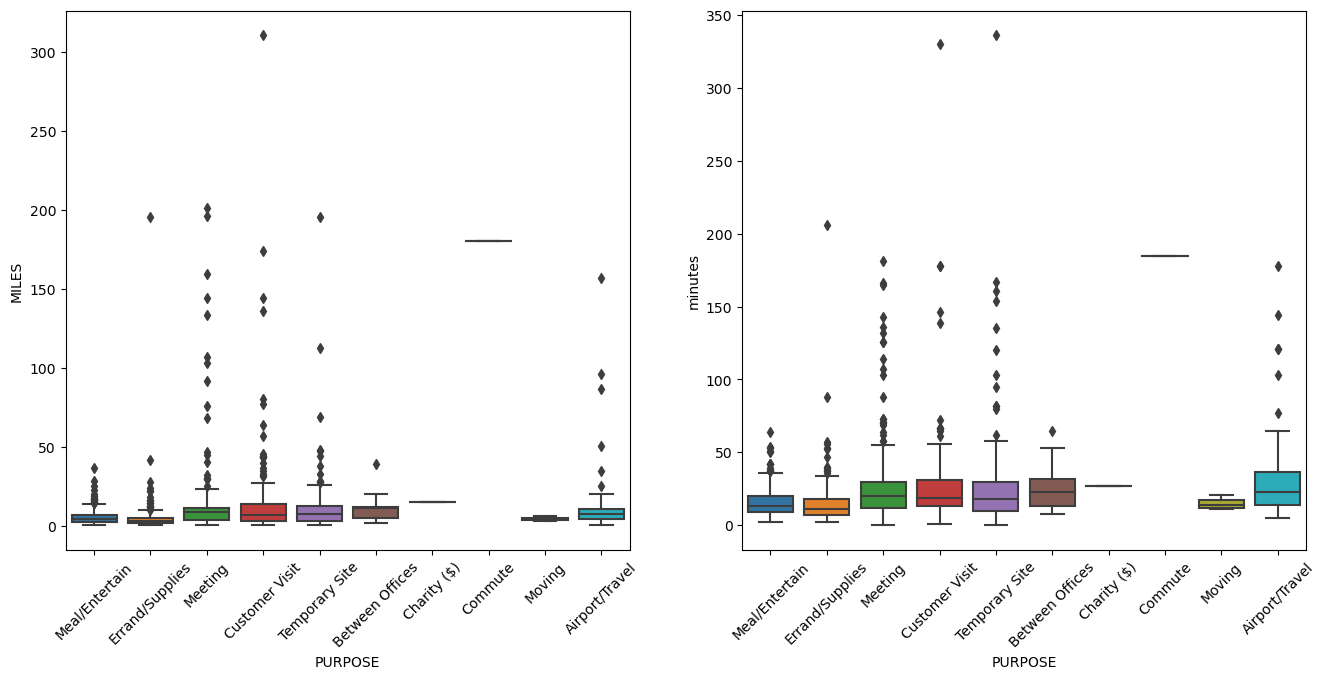

In [54]:
# Here we didn't used 'showfliers'
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minutes)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

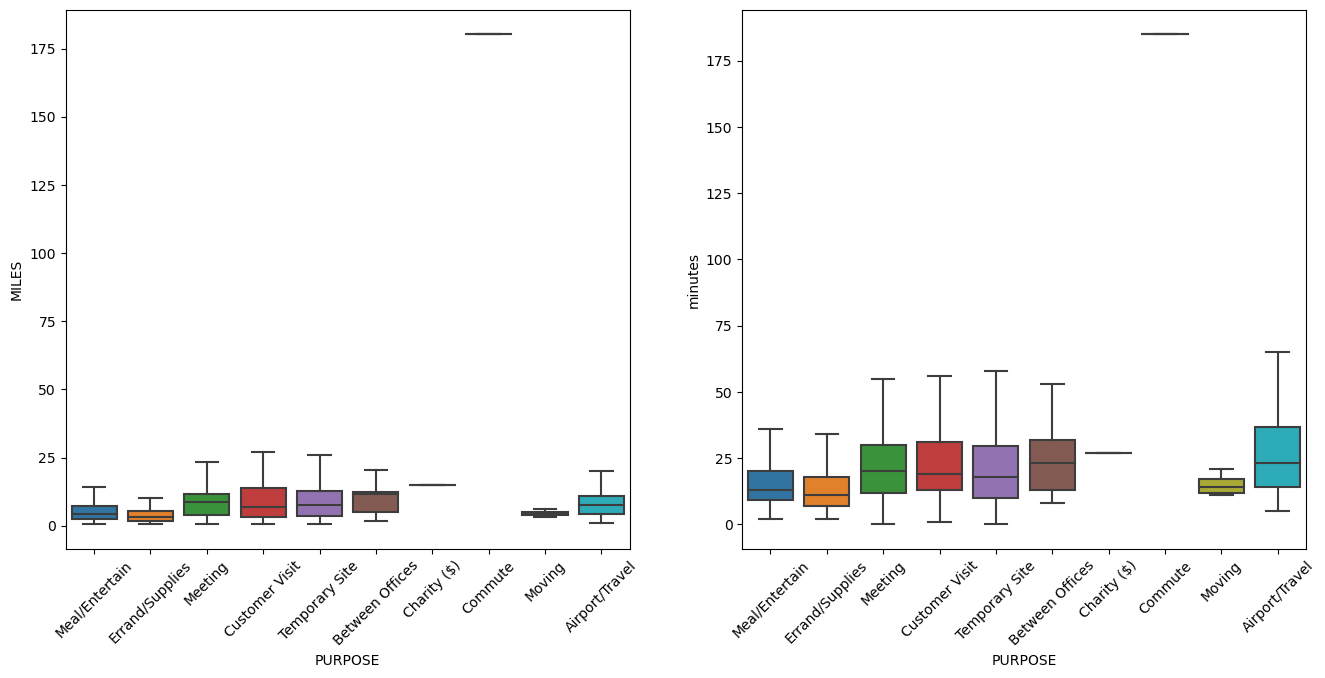

In [55]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES, showfliers = False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.minutes, showfliers=False)
plt.xticks(rotation=45)


In [57]:
#for each purpose what is min miles travelled, mean miles travelled and what is max miles travelled
pd.DataFrame({'Mean': df.groupby(['PURPOSE'])['MILES'].mean(),
              'Min': df.groupby(['PURPOSE'])['MILES'].min(),
              'Max' : df.groupby(['PURPOSE'])['MILES'].max()})

,Mean,Min,Max
PURPOSE,,,
Airport/Travel,14.953704,0.9,156.9
Between Offices,10.944444,1.9,39.2
Charity ($),15.100000,15.1,15.1
Commute,180.200000,180.2,180.2
Customer Visit,16.065806,0.6,310.3
Errand/Supplies,5.928902,0.5,195.3
Meal/Entertain,5.773878,0.6,36.5
Meeting,12.652597,0.7,201.0
Moving,4.550000,3.3,6.1


In [58]:
pd.DataFrame({'Mean': df.groupby(['PURPOSE'])['minutes'].mean(),
              'Min': df.groupby(['PURPOSE'])['minutes'].min(),
              'Max' : df.groupby(['PURPOSE'])['minutes'].max()})

,Mean,Min,Max
PURPOSE,,,
Airport/Travel,34.925926,5.0,178.0
Between Offices,25.500000,8.0,65.0
Charity ($),27.000000,27.0,27.0
Commute,185.000000,185.0,185.0
Customer Visit,28.387097,1.0,330.0
Errand/Supplies,15.710983,2.0,206.0
Meal/Entertain,15.926531,2.0,64.0
Meeting,25.954545,0.0,181.0
Moving,15.000000,11.0,21.0


In [59]:
df.groupby('PURPOSE')['MILES'].describe()

,count,mean,std,min,25%,50%,75%,max
PURPOSE,,,,,,,,
Airport/Travel,54.0,14.953704,26.588696,0.9,4.325,7.45,10.875,156.9
Between Offices,18.0,10.944444,8.458913,1.9,5.200,11.60,12.350,39.2
Charity ($),1.0,15.100000,NaN,15.1,15.100,15.10,15.100,15.1
Commute,1.0,180.200000,NaN,180.2,180.200,180.20,180.200,180.2
Customer Visit,155.0,16.065806,33.665367,0.6,3.150,6.90,13.950,310.3
Errand/Supplies,173.0,5.928902,15.429904,0.5,1.900,3.20,5.300,195.3
Meal/Entertain,245.0,5.773878,4.931104,0.6,2.500,4.20,7.200,36.5
Meeting,308.0,12.652597,23.597450,0.7,3.800,8.80,11.600,201.0
Moving,4.0,4.550000,1.181807,3.3,3.900,4.40,5.050,6.1


In [60]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'minutes'],
      dtype='object')

In [61]:
# Creating fucntion for checking round trip
def round(x):
    if x['START'] == x['STOP']:
        return 'YES'
    else:
        return 'NO'

In [62]:
# Adding the round trip column
df['Round_Trip'] = df.apply(round, axis=1)

In [63]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Round_Trip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,YES
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,YES
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,YES
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,YES
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,NO


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Round_Trip', ylabel='count'>

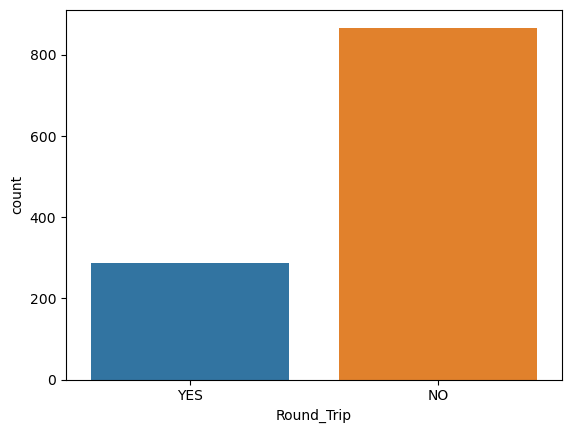

In [64]:
sns.countplot(df['Round_Trip'])

In [66]:
# Adding month column into the data set
df['month'] = pd.DatetimeIndex(df['START_DATE']).month

In [67]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Round_Trip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,YES,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,YES,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,YES,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,YES,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,NO,1


In [68]:
# making a dictionary for the month sof the year
dic = {1:'jan',2 : 'feb',3 :' mar',4:'apr',5 :'may', 6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'}

In [69]:
df['month'] = df['month'].map(dic)

In [70]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Round_Trip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,YES,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,YES,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,YES,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,YES,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,NO,jan


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

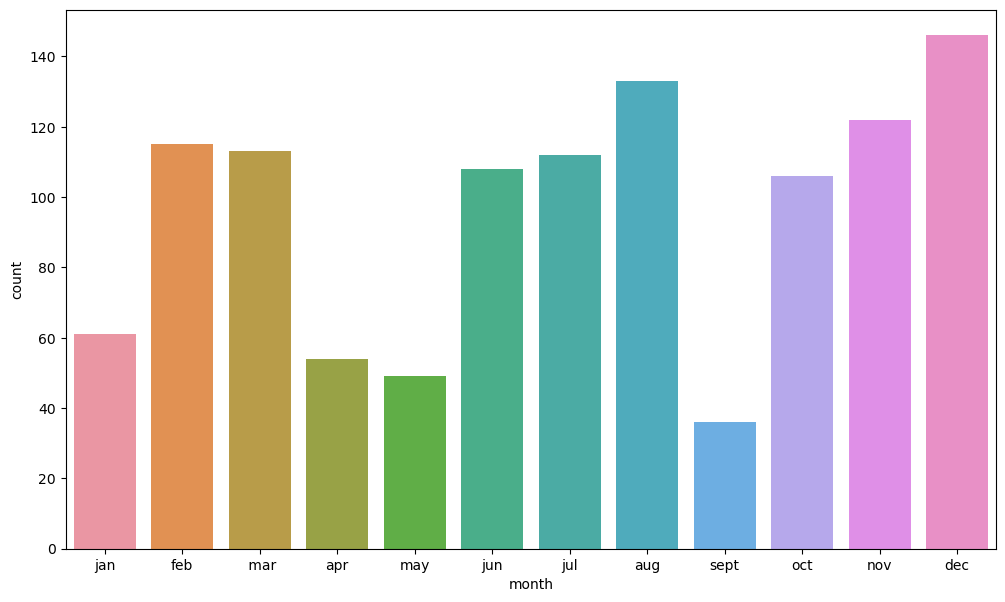

In [71]:
# Countplot for analysis of 'month' column
plt.figure(figsize=(12,7))
sns.countplot(df['month'])

<AxesSubplot:ylabel='month'>

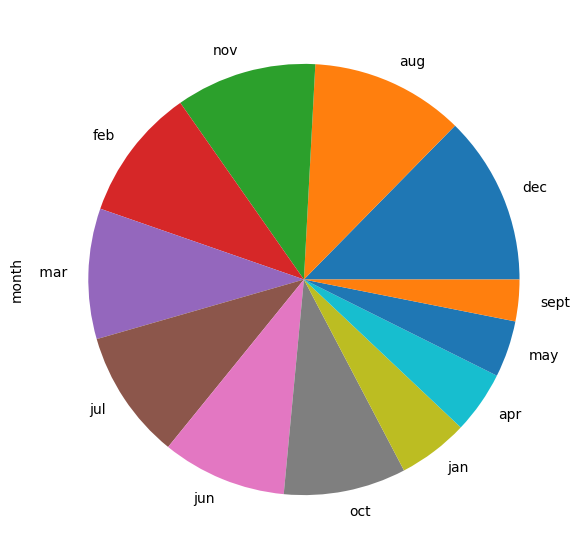

In [72]:
# Pieplot for analysis of 'month' column
plt.figure(figsize=(12,7))
df.month.value_counts().plot(kind='pie')

In [73]:
pd.set_option('display.max_rows',None)

In [74]:
# Number of Round_Trips for different purpose in different months
df.groupby(['month', 'PURPOSE'])['Round_Trip'].count()

month  PURPOSE        
 mar   Between Offices     2
       Customer Visit     24
       Errand/Supplies     9
       Meal/Entertain     53
       Meeting            23
       Temporary Site      2
apr    Between Offices     3
       Customer Visit      9
       Errand/Supplies     7
       Meal/Entertain     12
       Meeting            20
       Temporary Site      3
aug    Airport/Travel     52
       Customer Visit     19
       Meal/Entertain     11
       Meeting            17
       Temporary Site     34
dec    Airport/Travel      2
       Between Offices     1
       Customer Visit     26
       Errand/Supplies    47
       Meal/Entertain     31
       Meeting            30
       Temporary Site      9
feb    Between Offices     1
       Customer Visit     14
       Errand/Supplies    15
       Meal/Entertain     25
       Meeting            35
       Temporary Site     25
jan    Customer Visit     11
       Errand/Supplies    13
       Meal/Entertain     16
       Meeting      

<AxesSubplot:xlabel='minutes', ylabel='MILES'>

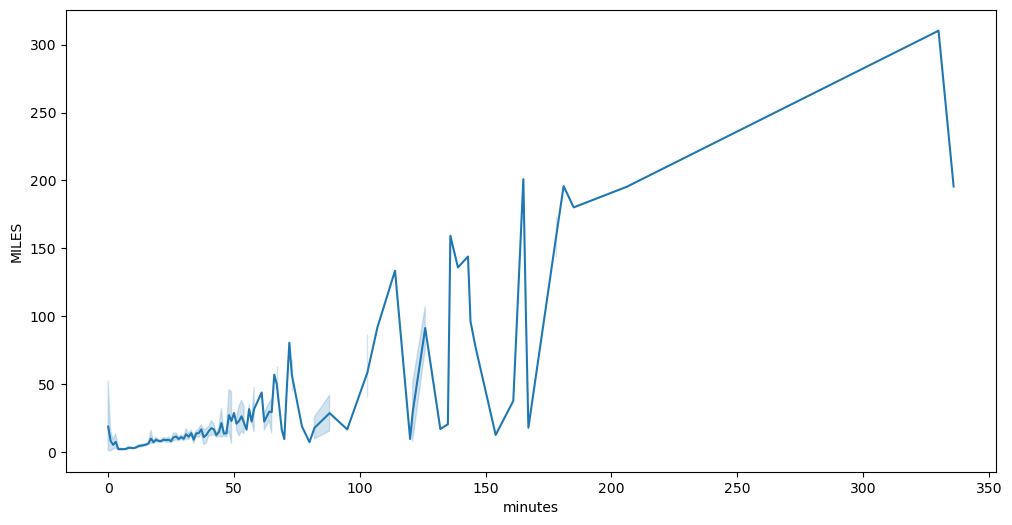

In [75]:
# Lineplot
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=df.minutes, y=df.MILES)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

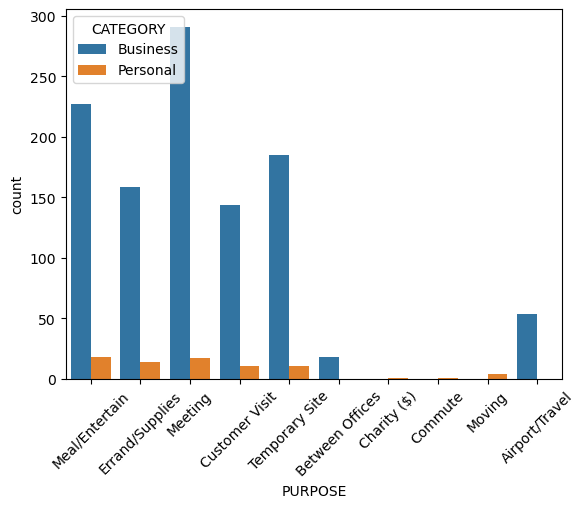

In [76]:
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=45)

In [77]:
df.describe()

,MILES,minutes
count,1155.000000,1155.000000
mean,10.566840,23.243290
std,21.579106,27.318277
min,0.500000,0.000000
25%,2.900000,10.000000
50%,6.000000,16.000000
75%,10.400000,27.500000
max,310.300000,336.000000


In [78]:
import pandas as pd
# read input data from a CSV file

df_describe = df.describe()    # get descriptive statistics of the DataFrame

df_describe.to_csv("output.csv")   # save the output to a CSV file
